In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import sys
import numpy as np
from tqdm import tqdm
sys.path.append('../../')

In [2]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import CMB

In [3]:
dir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v0'

In [4]:
cmb_const = CMB(dir,nside=2048,model='iso',beta=0.35,lensing=True,verbose=True)
cmb_td = CMB(dir,nside=2048,model='iso_td',mass=1.0,lensing=True,verbose=True)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(time dep.) cosmic birefringence model selected


In [41]:
eb_const, eb_td =  [], []
for i in tqdm(range(100)):
    elmc,blmc = hp.map2alm_spin(cmb_const.get_cb_lensed_QU(i),2,lmax=4096)
    elmt,blmt = hp.map2alm_spin(cmb_td.get_cb_lensed_QU(i),2,lmax=4096)
    eb_const.append(hp.alm2cl(elmc,blmc))
    eb_td.append(hp.alm2cl(elmt,blmt))
eb_const = np.array(eb_const)
eb_td = np.array(eb_td)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [20:10<00:00, 12.10s/it]


In [42]:
spectra_c = cmb_const.get_cb_lensed_spectra(beta=0.35,dl=False)
spectra_t = cmb_td.get_cb_lensed_mass_spectra(dl=False)

In [48]:
l = np.arange(4097)
dl = l*(l+1)

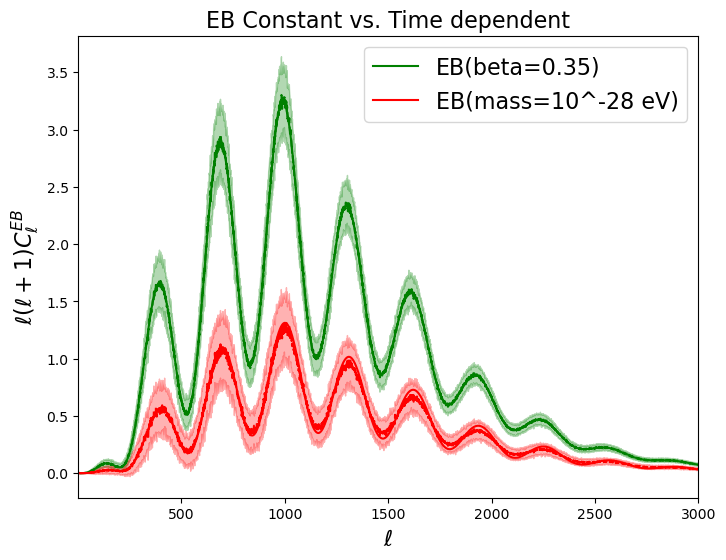

In [58]:
plt.figure(figsize=(8,6))
plt.plot(spectra_c['eb'][:4097]*dl,c= 'g', label='EB(beta=0.35)')
plt.plot(eb_const.mean(axis=0)*dl,c= 'g',ls='--')
plt.fill_between(np.arange(4097),(eb_const.mean(axis=0)-eb_const.std(axis=0))*dl,(eb_const.mean(axis=0)+eb_const.std(axis=0))*dl,color='g',alpha=0.3)
plt.plot(spectra_t['eb'][:4097]*dl,c= 'r', label='EB(mass=10^-28 eV)')
plt.plot(eb_td.mean(axis=0)*dl,c= 'r',ls='--')
plt.fill_between(np.arange(4097),(eb_td.mean(axis=0)-eb_td.std(axis=0))*dl,(eb_td.mean(axis=0)+eb_td.std(axis=0))*dl,color='r',alpha=0.3)
plt.legend(fontsize=16)
plt.xlabel(r'$\ell$',fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{EB}$',fontsize=16)
plt.xlim(2,3000)
plt.title('EB Constant vs. Time dependent',fontsize=16)